In [1]:
from pathlib import Path
import shutil

import amici
import amici.petab_import
import amici.petab_objective
from more_itertools import one
import numpy as np
import petab                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             


import petab_timecourse
from petab_timecourse import (
    import_directory_of_componentwise_files,
)

model_name = 'Cuadros_HealthPlace2020'

simulation_duration = 205  # simulated time
output_density = 10  # number of output timepoints per simulated time unit

petab_path = Path(model_name)

componentwise_timecourses_path = petab_path / 'regimens'

In [2]:
petab_yaml_location = str(one(petab_path.glob('*yaml')))
petab_problem = petab.Problem.from_yaml(str(one(petab_path.glob('*yaml'))))

import copy
original_petab_problem = copy.deepcopy(petab_problem)

In [3]:
timecourse_df, condition_df = import_directory_of_componentwise_files(
    componentwise_timecourses_path,
)
petab_problem = petab.Problem.from_yaml(petab_yaml_location)
petab_problem.condition_df = condition_df
petab_problem.timecourse_df = timecourse_df
petab_problem.sbml_model = petab_timecourse.sbml.add_timecourse_as_events(
    petab_problem,
    timecourse_id=one(petab_problem.timecourse_df.index),
)
petab_problem.condition_df = original_petab_problem.condition_df

In [4]:
#amici_model = amici.petab_import.import_petab_problem(petab_problem, force_compile=True)
amici_model = amici.petab_import.import_petab_problem(petab_problem)

2022-03-30 09:36:16.817 - amici.petab_import - INFO - Importing model ...
2022-03-30 09:36:16.820 - amici.petab_import - INFO - Model name is 'Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio'.
Writing model code to '/home/dilan/Documents/future_annex/optimal_control/packages/petab_timecourse/doc/examples/amici_models/Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio'.
2022-03-30 09:36:16.822 - amici.petab_import - INFO - Species: 36
2022-03-30 09:36:16.823 - amici.petab_import - INFO - Global parameters: 35
2022-03-30 09:36:16.823 - amici.petab_import - INFO - Reactions: 32
2022-03-30 09:36:16.948 - amici.petab_import - INFO - Observables: 37
2022-03-30 09:36:16.948 - amici.petab_import - INFO - Sigmas: 37
2022-03-30 09:36:16.994 - amici.petab_import - DEBUG - Adding output parameters to model: OrderedDict([('noiseParameter1_observable_Cumulative_cases_Counties_neighbouring_counties_with_airports', None), ('noiseParameter1_observable_Cu

2022-03-30 09:36:20.126 - amici.ode_export - INFO - Finished writing dwdp.cpp                    ++ (2.73E-01s)
2022-03-30 09:36:20.239 - amici.ode_export - INFO - Finished running smart_jacobian            ++++ (1.00E-01s)
2022-03-30 09:36:20.273 - amici.ode_export - INFO - Finished simplifying dwdx                  ++++ (3.05E-02s)
2022-03-30 09:36:20.273 - amici.ode_export - INFO - Finished computing dwdx                     +++ (1.38E-01s)
2022-03-30 09:36:20.306 - amici.ode_export - INFO - Finished writing dwdx.cpp                    ++ (1.76E-01s)
2022-03-30 09:36:20.330 - amici.ode_export - INFO - Finished running smart_jacobian            ++++ (1.31E-02s)
2022-03-30 09:36:20.365 - amici.ode_export - INFO - Finished simplifying dwdw                  ++++ (1.53E-02s)
2022-03-30 09:36:20.366 - amici.ode_export - INFO - Finished computing dwdw                     +++ (5.20E-02s)
2022-03-30 09:36:20.384 - amici.ode_export - INFO - Finished writing dwdw.cpp                    ++ (7.3

2022-03-30 09:36:21.582 - amici.ode_export - INFO - Finished writing deltax.cpp                  ++ (2.78E-02s)
2022-03-30 09:36:21.603 - amici.ode_export - INFO - Finished running smart_multiply            ++++ (1.55E-03s)
2022-03-30 09:36:21.619 - amici.ode_export - INFO - Finished running smart_multiply            ++++ (1.94E-04s)
2022-03-30 09:36:21.635 - amici.ode_export - INFO - Finished running smart_jacobian           +++++ (6.27E-03s)
2022-03-30 09:36:21.646 - amici.ode_export - INFO - Finished running smart_jacobian           +++++ (5.99E-03s)
2022-03-30 09:36:21.658 - amici.ode_export - INFO - Finished running smart_jacobian           +++++ (7.24E-03s)
2022-03-30 09:36:21.671 - amici.ode_export - INFO - Finished simplifying ddeltaxdx            +++++ (7.59E-03s)
2022-03-30 09:36:21.684 - amici.ode_export - INFO - Finished simplifying ddeltaxdx            +++++ (7.57E-03s)
2022-03-30 09:36:21.696 - amici.ode_export - INFO - Finished simplifying ddeltaxdx            +++++ (7.6

2022-03-30 09:36:22.384 - amici.ode_export - INFO - Finished computing x_solver                 +++ (6.40E-03s)
2022-03-30 09:36:22.387 - amici.ode_export - INFO - Finished writing x_solver.cpp                ++ (1.49E-02s)
2022-03-30 09:36:22.408 - amici.ode_export - INFO - Finished simplifying dx_rdatadx_solver     ++++ (7.41E-03s)
2022-03-30 09:36:22.410 - amici.ode_export - INFO - Finished computing dx_rdatadx_solver        +++ (1.40E-02s)
2022-03-30 09:36:22.416 - amici.ode_export - INFO - Finished writing dx_rdatadx_solver.cpp       ++ (2.46E-02s)
2022-03-30 09:36:22.448 - amici.ode_export - INFO - Finished simplifying dx_rdatadp            ++++ (1.48E-02s)
2022-03-30 09:36:22.448 - amici.ode_export - INFO - Finished computing dx_rdatadp               +++ (2.10E-02s)
2022-03-30 09:36:22.451 - amici.ode_export - INFO - Finished writing dx_rdatadp.cpp              ++ (2.84E-02s)
2022-03-30 09:36:22.466 - amici.ode_export - INFO - Finished running smart_jacobian            ++++ (4.7

running AmiciInstall
Adding OpenMP flags...
hdf5.h found in /usr/include/hdf5/serial
libhdf5.a found in /usr/lib/x86_64-linux-gnu/hdf5/serial
running build_ext
Changed extra_compile_args for unix to ['-fopenmp', '-std=c++14']
Building model extension in /home/dilan/Documents/future_annex/optimal_control/packages/petab_timecourse/doc/examples/amici_models/Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio
building 'Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio._Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio' extension
Testing SWIG executable swig4.0... SUCCEEDED.
swigging swig/Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio.i to swig/Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio_wrap.cpp
swig4.0 -python -c++ -modern -outdir Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio -I/home/dilan/Documents/future_annex/optimal_control/packages

In [5]:
sim = amici.petab_objective.simulate_petab(petab_problem, amici_model)

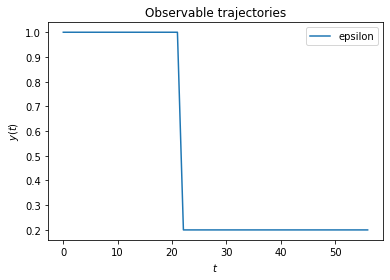

In [6]:
from amici.plotting import plotObservableTrajectories
import matplotlib.pyplot as plt
observable_indices=[amici_model.getObservableIds().index('observable_epsilon')]
plotObservableTrajectories(sim['rdatas'][0], model=amici_model, observable_indices=observable_indices)
plt.show()

In [7]:
from libsbml import formulaToL3String
print('trigger\t\tcomponent\tvalue')
for e in petab_problem.sbml_model.getListOfEvents():
    print(formulaToL3String(e.getTrigger().getMath()), end='\t')
    for a in e.getListOfEventAssignments():
        print(a.getVariable(), end='\t\t')
        print(formulaToL3String(a.getMath()))

trigger		component	value
time >= 1	epsilon		1
time >= 22	epsilon		0.2
time >= 75	epsilon		1


In [8]:
import pypesto.petab
# Import the problem and compile the model.
_importer = pypesto.petab.PetabImporter.from_yaml(petab_yaml_location)
#pypesto_problem = _importer.create_problem(force_compile=True)
pypesto_problem = _importer.create_problem(force_compile=True)

Compiling amici model to folder /home/dilan/Documents/future_annex/optimal_control/packages/petab_timecourse/doc/examples/amici_models/Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio.
2022-03-30 09:36:46.878 - amici.petab_import - INFO - Importing model ...
2022-03-30 09:36:46.880 - amici.petab_import - INFO - Model name is 'Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio'.
Writing model code to '/home/dilan/Documents/future_annex/optimal_control/packages/petab_timecourse/doc/examples/amici_models/Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio'.
2022-03-30 09:36:46.882 - amici.petab_import - INFO - Species: 36
2022-03-30 09:36:46.883 - amici.petab_import - INFO - Global parameters: 35
2022-03-30 09:36:46.883 - amici.petab_import - INFO - Reactions: 32
2022-03-30 09:36:47.071 - amici.petab_import - INFO - Observables: 37
2022-03-30 09:36:47.071 - amici.petab_import - INFO - Sigmas: 37
2022-03-30 09:36:47.116 

2022-03-30 09:36:49.519 - amici.ode_export - INFO - Finished computing dwdp                     +++ (2.60E-01s)
2022-03-30 09:36:49.588 - amici.ode_export - INFO - Finished writing dwdp.cpp                    ++ (3.33E-01s)
2022-03-30 09:36:49.704 - amici.ode_export - INFO - Finished running smart_jacobian            ++++ (8.55E-02s)
2022-03-30 09:36:49.739 - amici.ode_export - INFO - Finished simplifying dwdx                  ++++ (2.99E-02s)
2022-03-30 09:36:49.739 - amici.ode_export - INFO - Finished computing dwdx                     +++ (1.32E-01s)
2022-03-30 09:36:49.762 - amici.ode_export - INFO - Finished writing dwdx.cpp                    ++ (1.64E-01s)
2022-03-30 09:36:49.791 - amici.ode_export - INFO - Finished running smart_jacobian            ++++ (1.38E-02s)
2022-03-30 09:36:49.826 - amici.ode_export - INFO - Finished simplifying dwdw                  ++++ (1.62E-02s)
2022-03-30 09:36:49.827 - amici.ode_export - INFO - Finished computing dwdw                     +++ (5.3

2022-03-30 09:36:50.922 - amici.ode_export - INFO - Finished writing xdot.cpp                    ++ (3.15E-02s)
2022-03-30 09:36:50.930 - amici.ode_export - INFO - Finished writing y.cpp                       ++ (2.83E-03s)
2022-03-30 09:36:50.946 - amici.ode_export - INFO - Finished simplifying x_rdata               ++++ (4.72E-04s)
2022-03-30 09:36:50.947 - amici.ode_export - INFO - Finished computing x_rdata                  +++ (6.53E-03s)
2022-03-30 09:36:50.950 - amici.ode_export - INFO - Finished writing x_rdata.cpp                 ++ (1.50E-02s)
2022-03-30 09:36:50.961 - amici.ode_export - INFO - Finished simplifying total_cl              ++++ (1.24E-04s)
2022-03-30 09:36:50.962 - amici.ode_export - INFO - Finished computing total_cl                 +++ (4.18E-03s)
2022-03-30 09:36:50.963 - amici.ode_export - INFO - Finished writing total_cl.cpp                ++ (8.49E-03s)
2022-03-30 09:36:50.977 - amici.ode_export - INFO - Finished running smart_jacobian            ++++ (5.7

running AmiciInstall
Adding OpenMP flags...
hdf5.h found in /usr/include/hdf5/serial
libhdf5.a found in /usr/lib/x86_64-linux-gnu/hdf5/serial
running build_ext
Changed extra_compile_args for unix to ['-fopenmp', '-std=c++14']
Building model extension in /home/dilan/Documents/future_annex/optimal_control/packages/petab_timecourse/doc/examples/amici_models/Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio
building 'Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio._Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio' extension
Testing SWIG executable swig4.0... SUCCEEDED.
swigging swig/Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio.i to swig/Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio_wrap.cpp
swig4.0 -python -c++ -modern -outdir Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio -I/home/dilan/Documents/future_annex/optimal_control/packages

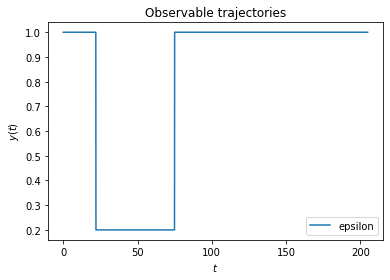

In [9]:
from amici.plotting import plotObservableTrajectories
import matplotlib.pyplot as plt

# Simulate and plot the timecourse parameter.
observable_indices=[pypesto_problem.objective.amici_model.getObservableIds().index('observable_epsilon')]

t = np.linspace(0, simulation_duration, simulation_duration*output_density + 1)
pypesto_problem.objective.amici_model.setTimepoints(t)

par_dict = pypesto_problem.objective.par_arr_to_dct(petab_problem.x_nominal)
ignored_pars = set(par_dict.keys()).difference(pypesto_problem.objective.amici_model.getParameterIds())
pypesto_problem.objective.amici_model.setParameterById({
    k: v
    for k, v in par_dict.items()
    if k not in ignored_pars
})
rdata = amici.runAmiciSimulation(
    pypesto_problem.objective.amici_model,
    pypesto_problem.objective.amici_solver,
)
plotObservableTrajectories(
    rdata,
    model=pypesto_problem.objective.amici_model,
    observable_indices=observable_indices,
)
plt.show()

In [10]:
import pypesto.engine
import pypesto.optimize

#optimizer = pypesto.optimize.ScipyOptimizer()
#engine = pypesto.engine.MultiProcessEngine()

optimizer = pypesto.optimize.FidesOptimizer()
engine = pypesto.engine.MultiProcessEngine()

pypesto_result = pypesto.optimize.minimize(
    problem=pypesto_problem,
    optimizer=optimizer,
    n_starts=16,
    engine=engine,
)

Engine set up to use up to 8 processes in total. The number was automatically determined and might not be appropriate on some systems.
Performing parallel task execution on 8 processes.
  0%|          | 0/16 [00:00<?, ?it/s]Using existing amici model in folder /home/dilan/Documents/future_annex/optimal_control/packages/petab_timecourse/doc/examples/amici_models/Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio.
Using existing amici model in folder /home/dilan/Documents/future_annex/optimal_control/packages/petab_timecourse/doc/examples/amici_models/Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio.
Using existing amici model in folder /home/dilan/Documents/future_annex/optimal_control/packages/petab_timecourse/doc/examples/amici_models/Cuadros2020___SIHRD_spatiotemporal_model_of_COVID_19_transmission_in_Ohio.
Using existing amici model in folder /home/dilan/Documents/future_annex/optimal_control/packages/petab_timecourse/doc/examples/amic

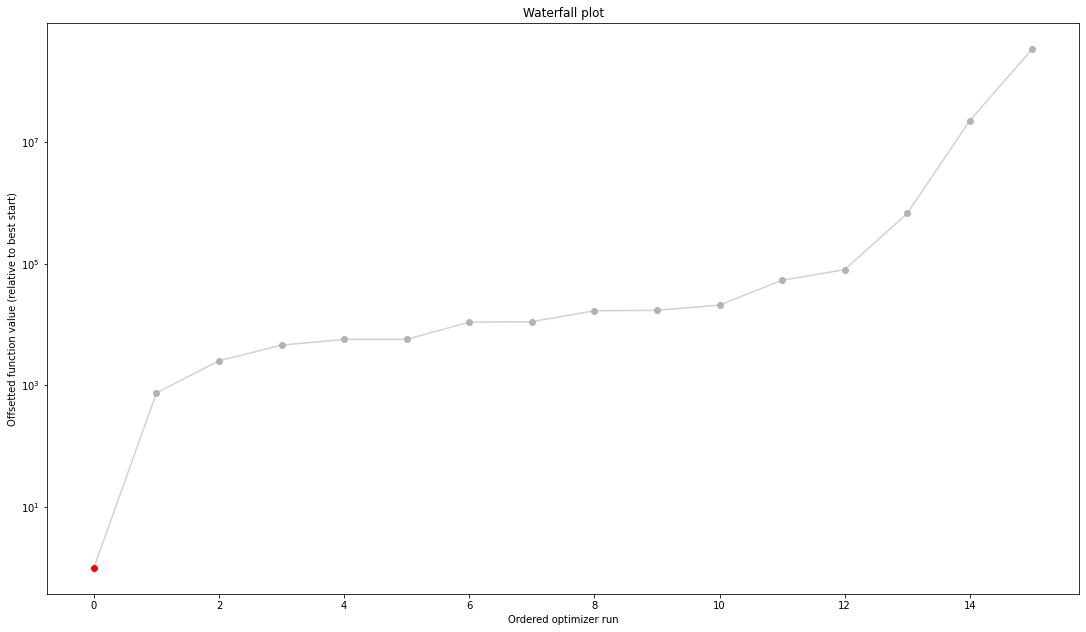

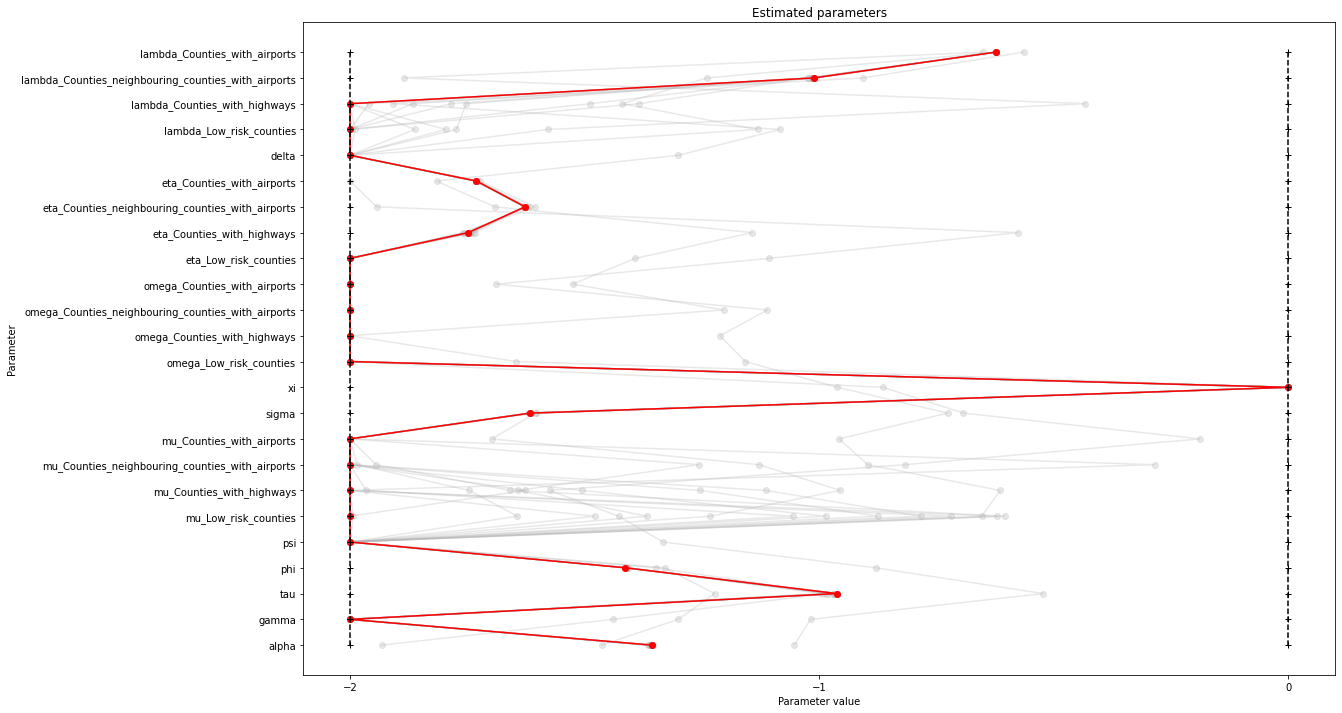

In [11]:
import pypesto.visualize
import matplotlib.pyplot as plt
# Plot optimization information.
pypesto.visualize.waterfall(pypesto_result)
pypesto.visualize.parameters(pypesto_result)
plt.show()

In [12]:
# Simulate and plot the MLE
'''
from amici.plotting import plotStateTrajectories, plotObservableTrajectories
import matplotlib.pyplot as plt
t = np.linspace(0, simulation_duration, simulation_duration*output_density + 1)
pypesto_problem.objective.amici_model.setTimepoints(t)
for start in pypesto_result.optimize_result.list:
    par_dict = pypesto_problem.objective.par_arr_to_dct(np.power(10, start['x']))
    ignored_pars = set(par_dict.keys()).difference(pypesto_problem.objective.amici_model.getParameterIds())
    pypesto_problem.objective.amici_model.setParameterById({
        k: v
        for k, v in par_dict.items()
        if k not in ignored_pars
    })
    #pypesto_problem.objective.amici_model.setParameters(
    #    np.power(10, start['x']),
    #)
    #solver = model.getSolver()
    rdata = amici.runAmiciSimulation(
        pypesto_problem.objective.amici_model,
        pypesto_problem.objective.amici_solver,
    )
     
    #plotStateTrajectories(rdata, model=pypesto_problem.objective.amici_model)
    plotObservableTrajectories(
        rdata,
        model=pypesto_problem.objective.amici_model,
        observable_indices=observable_indices,
    )
    #plt.plot(t, [get_expected_x(t_i) for t_i in t])
    plt.show()
'''

"\nfrom amici.plotting import plotStateTrajectories, plotObservableTrajectories\nimport matplotlib.pyplot as plt\nt = np.linspace(0, simulation_duration, simulation_duration*output_density + 1)\npypesto_problem.objective.amici_model.setTimepoints(t)\nfor start in pypesto_result.optimize_result.list:\n    par_dict = pypesto_problem.objective.par_arr_to_dct(np.power(10, start['x']))\n    ignored_pars = set(par_dict.keys()).difference(pypesto_problem.objective.amici_model.getParameterIds())\n    pypesto_problem.objective.amici_model.setParameterById({\n        k: v\n        for k, v in par_dict.items()\n        if k not in ignored_pars\n    })\n    #pypesto_problem.objective.amici_model.setParameters(\n    #    np.power(10, start['x']),\n    #)\n    #solver = model.getSolver()\n    rdata = amici.runAmiciSimulation(\n        pypesto_problem.objective.amici_model,\n        pypesto_problem.objective.amici_solver,\n    )\n     \n    #plotStateTrajectories(rdata, model=pypesto_problem.objectiv

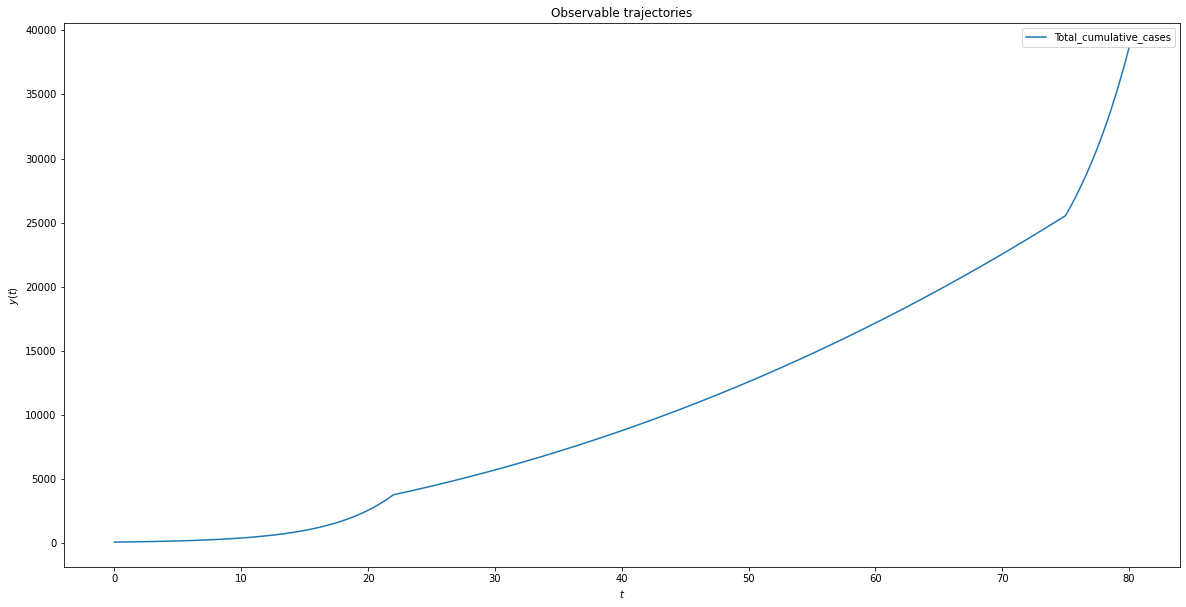

In [13]:
#print(pypesto_problem.objective.amici_model.getObservableIds())
for start in pypesto_result.optimize_result.list[:1]:
    observable_indices=[pypesto_problem.objective.amici_model.getObservableIds().index('observable_Total_cumulative_cases')]
    par_dict = pypesto_problem.objective.par_arr_to_dct(np.power(10, start['x']))
    ignored_pars = set(par_dict.keys()).difference(pypesto_problem.objective.amici_model.getParameterIds())
    pypesto_problem.objective.amici_model.setParameterById({
        k: v
        for k, v in par_dict.items()
        if k not in ignored_pars
    })
    #pypesto_problem.objective.amici_model.setParameters(
    #    np.power(10, start['x']),
    #)
    #solver = model.getSolver()
    pypesto_problem.objective.amici_model.setTimepoints(np.linspace(0, 80, 801))
    rdata = amici.runAmiciSimulation(
        pypesto_problem.objective.amici_model,
        pypesto_problem.objective.amici_solver,
    )
     
    #plotStateTrajectories(rdata, model=pypesto_problem.objective.amici_model)
    fig, ax = plt.subplots(figsize=(20,10))
    plotObservableTrajectories(
        rdata,
        model=pypesto_problem.objective.amici_model,
        observable_indices=observable_indices,
        ax=ax,
    )
    #ax.set_yscale('log')
    #plt.plot(t, [get_expected_x(t_i) for t_i in t])
    plt.show()

In [14]:
pypesto_problem.objective.check_grad_multi_eps(x=petab_problem.x_nominal_free)

                                                            grad  \
lambda_Counties_with_airports                      -3.898817e+08   
lambda_Counties_neighbouring_counties_with_airp... -2.204627e+08   
lambda_Counties_with_highways                      -4.052795e+07   
lambda_Low_risk_counties                           -1.493142e+07   
delta                                               3.685623e+08   
eta_Counties_with_airports                          1.355199e+08   
eta_Counties_neighbouring_counties_with_airports    7.332308e+07   
eta_Counties_with_highways                          1.311589e+07   
eta_Low_risk_counties                               3.071986e+06   
omega_Counties_with_airports                       -1.249280e+06   
omega_Counties_neighbouring_counties_with_airports -1.878683e+06   
omega_Counties_with_highways                       -7.661781e+05   
omega_Low_risk_counties                            -5.098077e+05   
xi                                              

                                                            grad  \
lambda_Counties_with_airports                      -3.898817e+08   
lambda_Counties_neighbouring_counties_with_airp... -2.204627e+08   
lambda_Counties_with_highways                      -4.052795e+07   
lambda_Low_risk_counties                           -1.493142e+07   
delta                                               3.685623e+08   
eta_Counties_with_airports                          1.355199e+08   
eta_Counties_neighbouring_counties_with_airports    7.332308e+07   
eta_Counties_with_highways                          1.311589e+07   
eta_Low_risk_counties                               3.071986e+06   
omega_Counties_with_airports                       -1.249280e+06   
omega_Counties_neighbouring_counties_with_airports -1.878683e+06   
omega_Counties_with_highways                       -7.661781e+05   
omega_Low_risk_counties                            -5.098077e+05   
xi                                              

                                                            grad  \
lambda_Counties_with_airports                      -3.898817e+08   
lambda_Counties_neighbouring_counties_with_airp... -2.204627e+08   
lambda_Counties_with_highways                      -4.052795e+07   
lambda_Low_risk_counties                           -1.493142e+07   
delta                                               3.685623e+08   
eta_Counties_with_airports                          1.355199e+08   
eta_Counties_neighbouring_counties_with_airports    7.332308e+07   
eta_Counties_with_highways                          1.311589e+07   
eta_Low_risk_counties                               3.071986e+06   
omega_Counties_with_airports                       -1.249280e+06   
omega_Counties_neighbouring_counties_with_airports -1.878683e+06   
omega_Counties_with_highways                       -7.661781e+05   
omega_Low_risk_counties                            -5.098077e+05   
xi                                              

                                                            grad  \
lambda_Counties_with_airports                      -3.898817e+08   
lambda_Counties_neighbouring_counties_with_airp... -2.204627e+08   
lambda_Counties_with_highways                      -4.052795e+07   
lambda_Low_risk_counties                           -1.493142e+07   
delta                                               3.685623e+08   
eta_Counties_with_airports                          1.355199e+08   
eta_Counties_neighbouring_counties_with_airports    7.332308e+07   
eta_Counties_with_highways                          1.311589e+07   
eta_Low_risk_counties                               3.071986e+06   
omega_Counties_with_airports                       -1.249280e+06   
omega_Counties_neighbouring_counties_with_airports -1.878683e+06   
omega_Counties_with_highways                       -7.661781e+05   
omega_Low_risk_counties                            -5.098077e+05   
xi                                              

                                                            grad  \
lambda_Counties_with_airports                      -3.898817e+08   
lambda_Counties_neighbouring_counties_with_airp... -2.204627e+08   
lambda_Counties_with_highways                      -4.052795e+07   
lambda_Low_risk_counties                           -1.493142e+07   
delta                                               3.685623e+08   
eta_Counties_with_airports                          1.355199e+08   
eta_Counties_neighbouring_counties_with_airports    7.332308e+07   
eta_Counties_with_highways                          1.311589e+07   
eta_Low_risk_counties                               3.071986e+06   
omega_Counties_with_airports                       -1.249280e+06   
omega_Counties_neighbouring_counties_with_airports -1.878683e+06   
omega_Counties_with_highways                       -7.661781e+05   
omega_Low_risk_counties                            -5.098077e+05   
xi                                              

,grad,fd_f,fd_b,fd_c,fd_err,abs_err,rel_err,eps
lambda_Counties_with_airports,-3.898817e+08,-3.899040e+08,-3.898593e+08,-3.898817e+08,44658.279419,0.589560,1.512151e-09,0.00001
lambda_Counties_neighbouring_counties_with_airports,-2.204627e+08,-2.204716e+08,-2.204538e+08,-2.204627e+08,17858.505249,2.411205,1.093702e-08,0.00001
lambda_Counties_with_highways,-4.052795e+07,-4.052915e+07,-4.052674e+07,-4.052795e+07,2418.327332,1.080490,2.666037e-08,0.00001
lambda_Low_risk_counties,-1.493142e+07,-1.493178e+07,-1.493104e+07,-1.493141e+07,731.611252,7.738447,5.182663e-07,0.00001
delta,3.685623e+08,3.685542e+08,3.685705e+08,3.685623e+08,16256.952286,0.275009,7.461671e-10,0.00001
eta_Counties_with_airports,1.355199e+08,1.355187e+08,1.355211e+08,1.355199e+08,2349.567413,2.044548,1.508670e-08,0.00001
eta_Counties_neighbouring_counties_with_airports,7.332308e+07,7.332275e+07,7.332341e+07,7.332308e+07,660.181046,1.848910,2.521593e-08,0.00001
eta_Counties_with_highways,1.311589e+07,1.311585e+07,1.311593e+07,1.311589e+07,78.105927,1.241326,9.464289e-08,0.00001
eta_Low_risk_counties,3.071986e+06,3.071994e+06,3.071976e+06,3.071985e+06,17.964363,1.326132,4.316858e-07,0.00100
omega_Counties_with_airports,-1.249280e+06,-1.249697e+06,-1.248862e+06,-1.249280e+06,834.724903,0.405041,3.242195e-07,0.00100
